## Importing the libraries

In [10]:
import pandas as pd

## Load and Explore the Data

In [11]:
df = pd.read_csv('A. Raw_Data.csv')

In [12]:
x = df.shape[0]
y = df.shape[1]
print(f"Data has {x} rows and {y} columns.")

Data has 10000 rows and 14 columns.


In [13]:
df.dtypes.to_frame().rename({0:"dtype"} , axis=1)

,dtype
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [14]:
df.isna().sum().to_frame().rename(columns={0:"% of Null Values"}) / df.shape[0] * 100

,% of Null Values
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


## Omit Unnecessary Columns

In [15]:
# obviusly enough, these 3 columns bear no importance
df.index = df["RowNumber"]
df.drop(columns=["RowNumber" , "CustomerId" , "Surname"] , inplace=True)
df.index.name = "index"

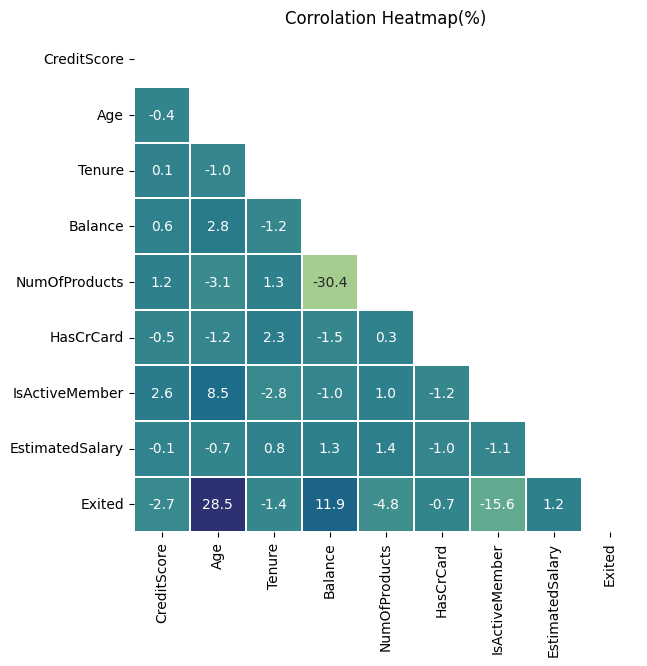

In [16]:
# check corrolation between features and label ,
# and also between features, high corrolation 
# between features makes the model biased
import matplotlib.pyplot as plt
from seaborn import heatmap , color_palette
from numpy import triu , ones_like

Corrolation = df._get_numeric_data().corr()
Mask = triu(ones_like(Corrolation, dtype=bool))

fig , ax = plt.subplots(nrows=1 , ncols=1)
ax = heatmap(Corrolation*100 , annot=True , mask=Mask ,
                cbar=False , cmap="crest" , fmt=".1f",
                linewidths = 0.108 )
fig.set_size_inches(6.5,6.5)
ax.set_title("Corrolation Heatmap(%)")
plt.show()

del plt , heatmap , triu , ones_like

In [17]:
# <Balance> and <NumOfProducts> have a very high corrolation,
# so one of them should be dropped; <NumofProducts> is selected
# as the victim, becauses it is corrolated to the label in a
#  weaker way,(comparing <Balance>)
df.drop(columns=["NumOfProducts"] , inplace=True)

In [18]:
df.to_csv("B. Cleaned_Data.csv")